In [23]:
# import libraries

import kaleido
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go


pio.renderers.default = "svg"

In [24]:
# import data

df_delay = pd.read_excel("get_around_delay_analysis.xlsx")
df_delay

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0
21306,573790,341965,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN


In [25]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [26]:
df_delay.describe(include="all")

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


mobile     17003
connect     4307
Name: checkin_type, dtype: int64


<AxesSubplot: xlabel='checkin_type', ylabel='count'>

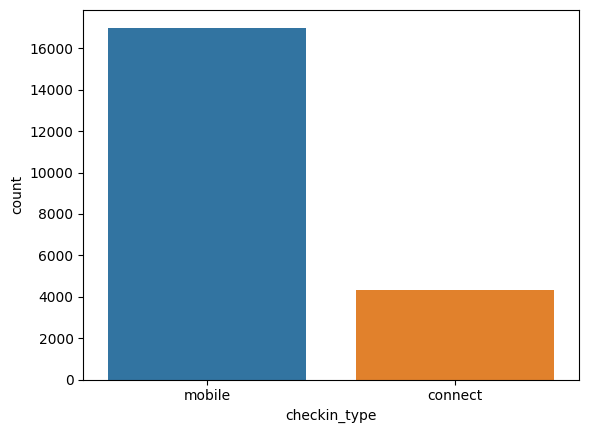

In [27]:
print(df_delay['checkin_type'].value_counts())
sns.countplot(x=df_delay['checkin_type'])

ended       18045
canceled     3265
Name: state, dtype: int64


<AxesSubplot: xlabel='state', ylabel='count'>

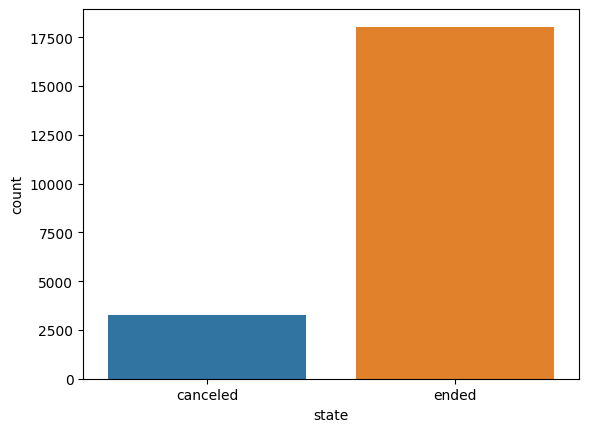

In [28]:
print(df_delay['state'].value_counts())
sns.countplot(data=df_delay, x='state')

ended       18045
canceled     3265
Name: state, dtype: int64


<AxesSubplot: xlabel='state', ylabel='count'>

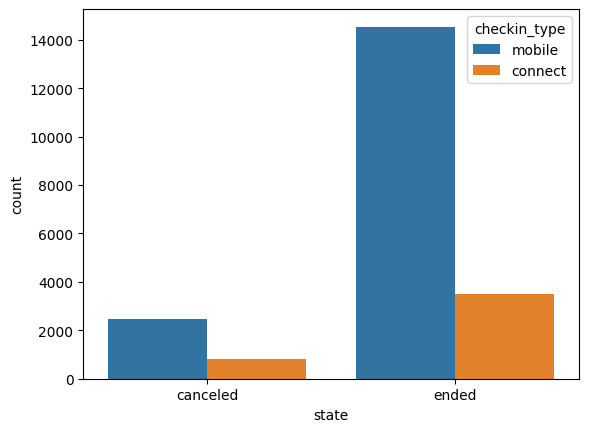

In [29]:
print(df_delay['state'].value_counts())
sns.countplot(data=df_delay, x='state', hue='checkin_type')

Join columns from df_delay and the delay_at_checkout_in_minutes of the previous rental

In [30]:
df_delay_new = df_delay.merge(df_delay[['rental_id','delay_at_checkout_in_minutes']], left_on='previous_ended_rental_id', right_on='rental_id', how='left')
df_delay_new

,rental_id_x,car_id,checkin_type,state,delay_at_checkout_in_minutes_x,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,rental_id_y,delay_at_checkout_in_minutes_y
0,505000,363965,mobile,canceled,NaN,NaN,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0,573429.0,NaN
21306,573790,341965,mobile,ended,-337.0,NaN,NaN,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN,NaN,NaN


create a feature delay checkout : yes or no
yes : delay_at_checkout_in_minutes >= 0
create a feature delay checkin : yes or no
yes : delay_at_checkin_in_minutes >= 0

In [31]:
# keeps only the delays and sets the other values to 0
df_delay_new['delay_at_checkout_in_minutes'] = df_delay_new['delay_at_checkout_in_minutes_x'].apply(lambda x : x if x >0
else 0)
# create a new feature : delay_checkout yes or no
df_delay_new['delay'] = df_delay_new["delay_at_checkout_in_minutes"].apply(lambda x : "yes" if x > 0 else "no")
# keeps only the delays and sets the other values to o
df_delay_new['delay_at_checkout_with_previous_rental'] = df_delay_new['delay_at_checkout_in_minutes_y'].apply(lambda x : x if x >0
else 0)
# calculate the delay at checkin
df_delay_new['delay_at_checkin_in_minutes'] = df_delay_new['delay_at_checkout_with_previous_rental'] - df_delay_new['time_delta_with_previous_rental_in_minutes']
df_delay_new['delay_at_checkin_in_minutes'] = df_delay_new['delay_at_checkin_in_minutes'].apply(lambda x : x if x >0 else 0)
# create a new feature : delay_checkin yes or no
df_delay_new['delay_checkin'] = df_delay_new['delay_at_checkin_in_minutes'].apply(lambda x : "yes" if x >0
else "no")
# drop the old columns
df_delay_new.drop(columns=['delay_at_checkout_in_minutes_y','delay_at_checkout_in_minutes_x','rental_id_y' ], inplace = True)

In [32]:
df_delay_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21310 entries, 0 to 21309
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id_x                                 21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   previous_ended_rental_id                    1841 non-null   float64
 5   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
 6   delay_at_checkout_in_minutes                21310 non-null  float64
 7   delay                                       21310 non-null  object 
 8   delay_at_checkout_with_previous_rental      21310 non-null  float64
 9   delay_at_checkin_in_minutes                 21310 non-null  float64
 10  delay_chec

no     11906
yes     9404
Name: delay, dtype: int64
% no delay 0.5587048334115439
% yes delay 0.44129516658845613


<AxesSubplot: xlabel='delay', ylabel='count'>

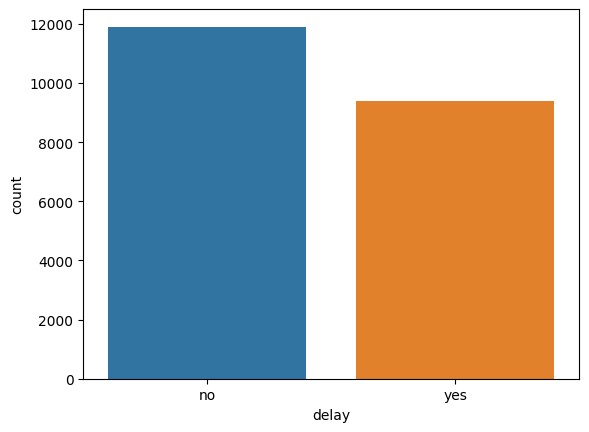

In [33]:
print(df_delay_new['delay'].value_counts())
print("% no delay", sum(df_delay_new['delay']=="no")/len(df_delay_new['delay']))
print("% yes delay",sum(df_delay_new['delay']=="yes")/len(df_delay_new['delay']))
sns.countplot(data=df_delay_new, x='delay')

In [34]:
print(f'number of rental cars : {len(df_delay_new["delay"])}')

number of rental cars : 21310


number of delays : 9404
number of rental cars : 21310


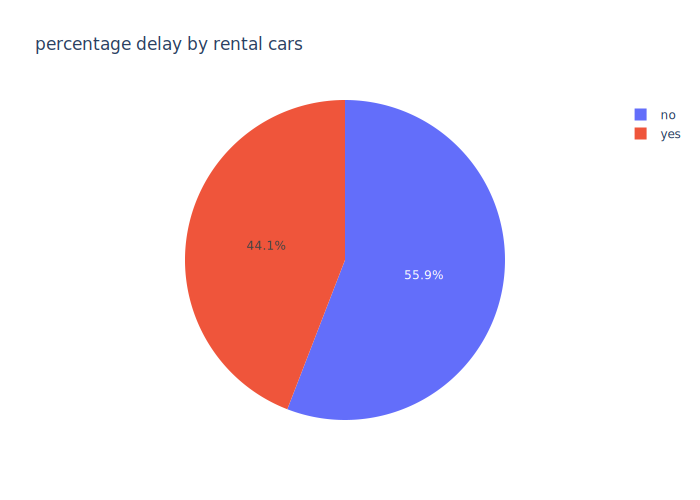

In [35]:
print(f'number of delays : {sum(df_delay_new["delay"]=="yes")}')
print(f'number of rental cars : {len(df_delay_new["delay"])}')
fig = px.pie(df_delay_new, 'delay', title="percentage delay by rental cars")
fig.show()

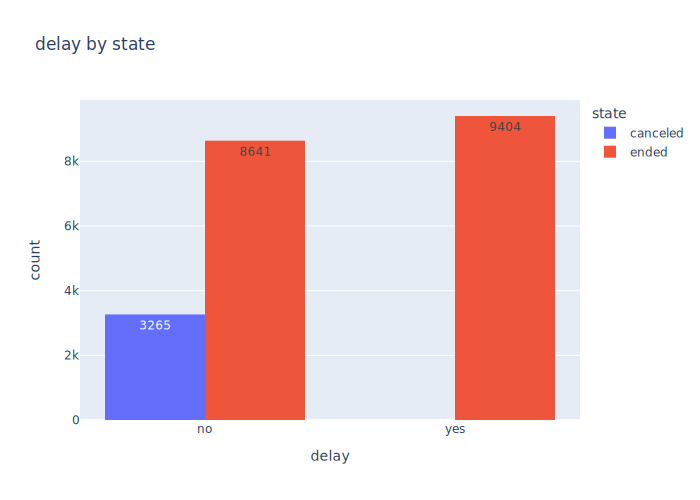

In [36]:
fig = px.histogram(df_delay_new, 
                    x = 'delay',
                    color = 'state',
                    text_auto = '.0f',
                    barmode = 'group',
                    title = 'delay by state')
fig.show()

In [37]:
display(df_delay_new.groupby('delay')['checkin_type'].value_counts())

delay  checkin_type
no     mobile          9058
       connect         2848
yes    mobile          7945
       connect         1459
Name: checkin_type, dtype: int64

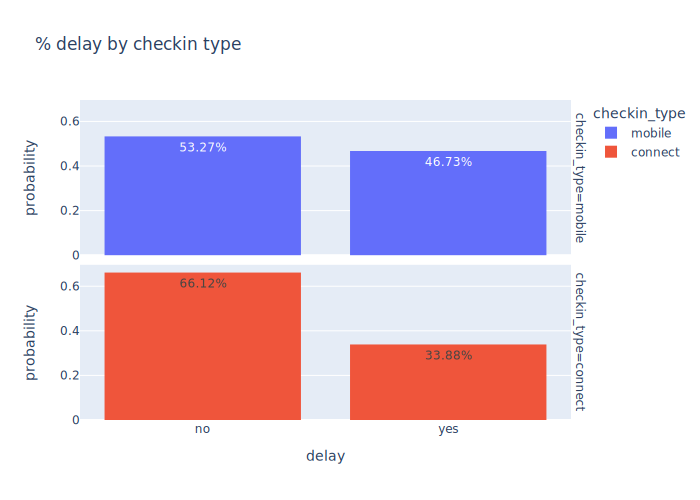

In [38]:
fig = px.histogram(df_delay_new, 
                    x = 'delay',
                    color = 'checkin_type',
                    facet_row = 'checkin_type',
                    histnorm = 'probability',
                    text_auto = '.2%',
                    title = '% delay by checkin type')
fig.show()

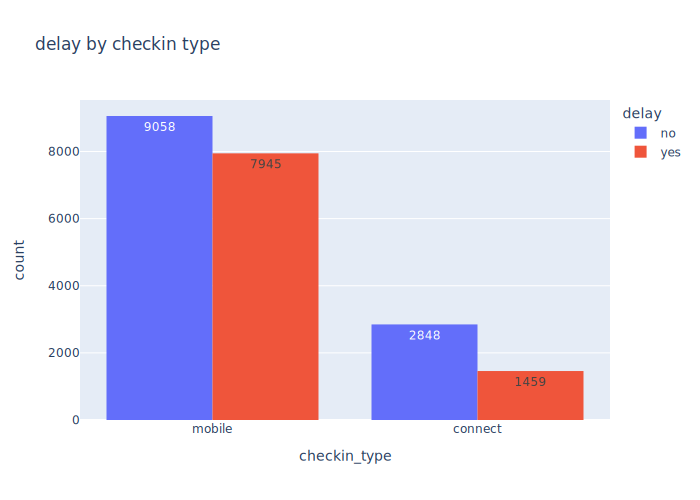

In [39]:
fig = px.histogram(df_delay_new, 
                    x = 'checkin_type',
                    color = 'delay',
                    text_auto = '.0f',
                    barmode = 'group',
                    title = 'delay by checkin type')
fig.show()

In [40]:
print(f'number of previous rental with delay lower than 12 hours : {sum(df_delay["previous_ended_rental_id"].notna())}')
round(100* sum(df_delay["previous_ended_rental_id"].notna())/len(df_delay), 2)

number of previous rental with delay lower than 12 hours : 1841


8.64

In [41]:
df_delay[df_delay["previous_ended_rental_id"].notna()]

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
6,511639,370585,connect,ended,-15.0,563782.0,570.0
19,519491,312389,mobile,ended,58.0,545639.0,420.0
23,521156,392479,mobile,ended,NaN,537298.0,0.0
34,525044,349751,mobile,ended,NaN,510607.0,60.0
40,528808,181625,connect,ended,-76.0,557404.0,330.0
...,...,...,...,...,...,...,...
21269,568049,381499,connect,canceled,NaN,562174.0,720.0
21272,568241,396409,mobile,canceled,NaN,566136.0,570.0
21275,568523,297973,mobile,ended,12.0,567121.0,240.0
21286,569717,377312,mobile,ended,230.0,545045.0,90.0


In [42]:
df_delay_new['delay_checkin'].value_counts()

no     21092
yes      218
Name: delay_checkin, dtype: int64

In [43]:
df_delay_new[df_delay_new['delay_checkin']=="yes"]

,rental_id_x,car_id,checkin_type,state,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_at_checkout_in_minutes,delay,delay_at_checkout_with_previous_rental,delay_at_checkin_in_minutes,delay_checkin
148,540479,374684,mobile,ended,539751.0,0.0,12.0,yes,3.0,3.0,yes
164,541862,382364,mobile,ended,540607.0,0.0,125.0,yes,1.0,1.0,yes
438,559781,408776,mobile,ended,540868.0,0.0,44.0,yes,26.0,26.0,yes
735,574568,301512,mobile,ended,572909.0,0.0,110.0,yes,13.0,13.0,yes
844,535519,353425,connect,ended,533413.0,0.0,0.0,no,4.0,4.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
20918,561206,312603,connect,ended,554958.0,30.0,10.0,yes,183.0,153.0,yes
20924,561476,410402,mobile,ended,550186.0,0.0,11.0,yes,21.0,21.0,yes
21021,560740,383344,connect,ended,534678.0,60.0,17.0,yes,164.0,104.0,yes
21169,566008,378689,mobile,canceled,564756.0,0.0,0.0,no,39.0,39.0,yes


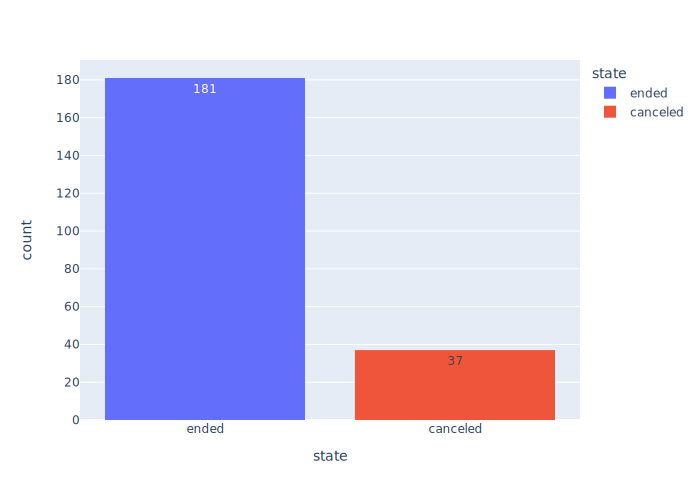

In [44]:
fig = px.histogram(df_delay_new[df_delay_new['delay_checkin']=="yes"],
                    x = "state",
                    color = 'state',
                    text_auto = '.0f',
                    )
fig.show()

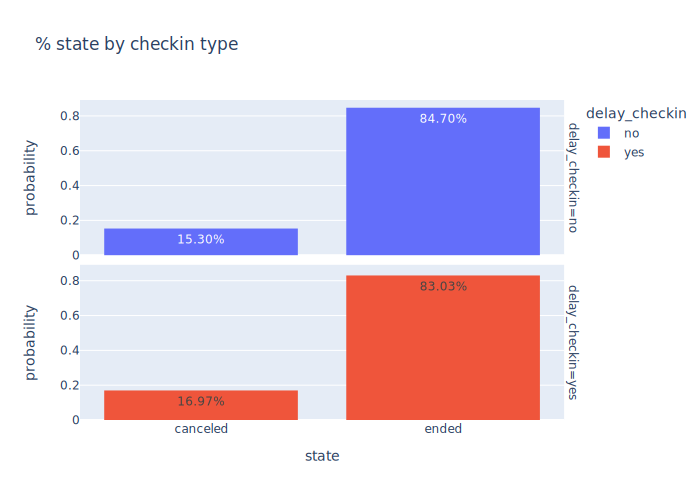

In [45]:
fig = px.histogram(df_delay_new, 
                    x = "state",
                    color = 'delay_checkin',
                    facet_row = 'delay_checkin',
                    histnorm = 'probability',
                    text_auto = '.2%',
                    title = ' % state by checkin type')
fig.show()

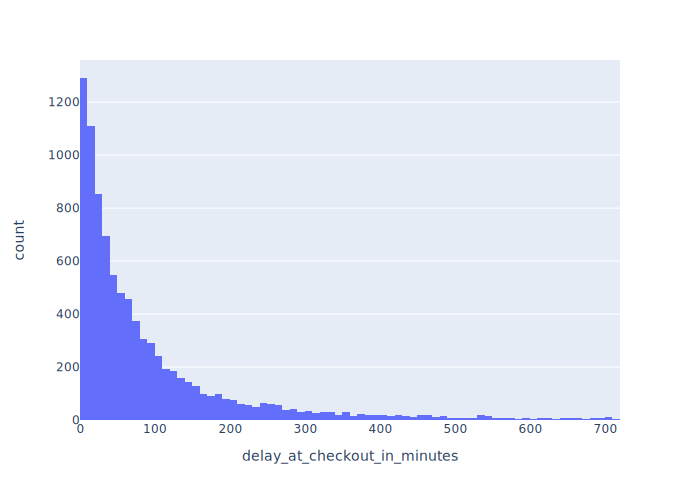

In [46]:
fig = px.histogram(df_delay_new[df_delay_new['delay_at_checkout_in_minutes']>0],
                    x ='delay_at_checkout_in_minutes',
                    range_x = [0,720],
                    nbins=7200
                    )
fig.show()

In [50]:
df_with_previous_rental = df_delay_new[df_delay_new["previous_ended_rental_id"].notna()]
print(len(df_with_previous_rental))
df_with_previous_rental.head()

1841


,rental_id_x,car_id,checkin_type,state,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_at_checkout_in_minutes,delay,delay_at_checkout_with_previous_rental,delay_at_checkin_in_minutes,delay_checkin
6,511639,370585,connect,ended,563782.0,570.0,0.0,no,136.0,0.0,no
19,519491,312389,mobile,ended,545639.0,420.0,58.0,yes,140.0,0.0,no
23,521156,392479,mobile,ended,537298.0,0.0,0.0,no,0.0,0.0,no
34,525044,349751,mobile,ended,510607.0,60.0,0.0,no,0.0,0.0,no
40,528808,181625,connect,ended,557404.0,330.0,0.0,no,0.0,0.0,no


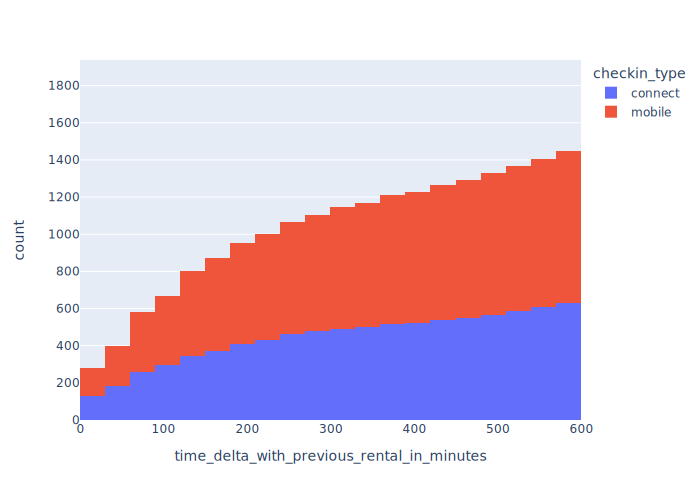

In [63]:
fig = px.histogram(df_with_previous_rental,
                    x ='time_delta_with_previous_rental_in_minutes',
                    color = 'checkin_type',
                    range_x = [0,600],
                    nbins=3600,
                    cumulative = True
                    )
fig.show()

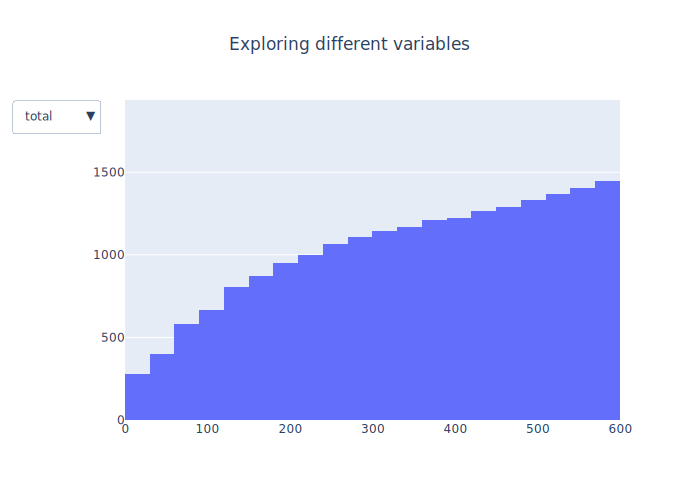

In [65]:
# Example of how to allow the selection of a type of a variable
df = df_delay_new[df_delay_new["previous_ended_rental_id"].notna()]
df_mobile = df[df['checkin_type']=="mobile"]
df_connect = df[df['checkin_type']=="connect"]

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x =df['time_delta_with_previous_rental_in_minutes'],
        nbinsx = 3600,
        cumulative_enabled=True))

fig.add_trace(
    go.Histogram(
        x =df_mobile['time_delta_with_previous_rental_in_minutes'],
        cumulative_enabled=True,
        nbinsx = 3600,
        visible = False))

fig.add_trace(
    go.Histogram(
        x =df_connect['time_delta_with_previous_rental_in_minutes'],
        cumulative_enabled=True,
        nbinsx = 3600,
        visible = False))

fig.update_layout(
        
        title = go.layout.Title(text = "Exploring different variables", x = 0.5),
        xaxis = go.layout.XAxis(range=[0,600]),
        showlegend = False)
       

fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "total",
                        method = "update",
                        args = [{"visible" : [True, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "mobile",
                            method = "update",
                            args = [{"visible" : [False, True, False]}]),
                    go.layout.updatemenu.Button(
                            label = "connect",
                            method = "update",
                            args = [{"visible" : [False, False, True]}]),
                ]
    )]
)

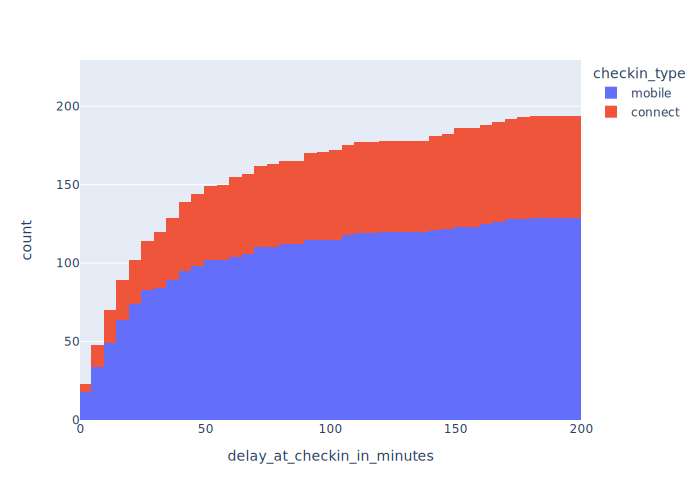

In [61]:
fig = px.histogram(df_delay_new[df_delay_new['delay_at_checkin_in_minutes']>0],
                    x ='delay_at_checkin_in_minutes',
                    color = 'checkin_type',
                    range_x = [0,200],
                    nbins=4000,
                    cumulative = True
                    )
fig.show()

In [64]:
df_mobile = df[df['checkin_type']=="mobile"]
df_connect = df[df['checkin_type']=="connect"]
df_connect.head()

,rental_id_x,car_id,checkin_type,state,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_at_checkout_in_minutes,delay,delay_at_checkout_with_previous_rental,delay_at_checkin_in_minutes,delay_checkin
844,535519,353425,connect,ended,533413.0,0.0,0.0,no,4.0,4.0,yes
2113,553939,402528,connect,ended,558730.0,0.0,0.0,no,6.0,6.0,yes
2119,554505,402562,connect,ended,554934.0,0.0,0.0,no,12.0,12.0,yes
2181,559037,349171,connect,canceled,552392.0,0.0,0.0,no,46.0,46.0,yes
2186,559430,357530,connect,ended,558258.0,0.0,0.0,no,2.0,2.0,yes


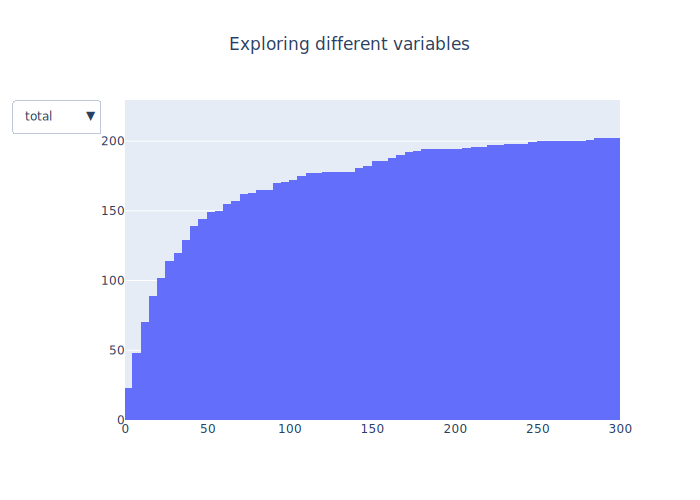

In [77]:
# Example of how to allow the selection of a type of a variable
df = df_delay_new[df_delay_new['delay_at_checkin_in_minutes']>0]
df_mobile = df[df['checkin_type']=="mobile"]
df_connect = df[df['checkin_type']=="connect"]

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x =df['delay_at_checkin_in_minutes'],
        nbinsx = 3600,
        cumulative_enabled=True
        )
        
        )

fig.add_trace(
    go.Histogram(
        x =df_mobile['delay_at_checkin_in_minutes'],
        cumulative_enabled=True,
        nbinsx = 3600,
        visible = False))

fig.add_trace(
    go.Histogram(
        x =df_connect['delay_at_checkin_in_minutes'],
        cumulative_enabled=True,
        nbinsx = 3600,
        visible = False))

fig.update_layout(
        
        title = go.layout.Title(text = "Exploring different variables", x = 0.5),
        xaxis = go.layout.XAxis(range=[0,300]),
        showlegend = False)
       

fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "total",
                        method = "update",
                        args = [{"visible" : [True, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "mobile",
                            method = "update",
                            args = [{"visible" : [False, True, False]}]),
                    go.layout.updatemenu.Button(
                            label = "connect",
                            method = "update",
                            args = [{"visible" : [False, False, True]}]),
                    
                ]
    )]
)

In [105]:
def threshold(checkin_type, minutes):
    df_with_previous_rental = df_delay_new[df_delay_new["previous_ended_rental_id"].notna()]
    
    if checkin_type == "all":
        df_delay_checkin = df_delay_new[df_delay_new['delay_at_checkin_in_minutes']>0]
        
        print(len(df_with_previous_rental[df_with_previous_rental['time_delta_with_previous_rental_in_minutes']<minutes]
        )/len(df_with_previous_rental))
        print(len(df_delay_checkin[df_delay_checkin['delay_at_checkin_in_minutes']<=minutes])/len(df_delay_checkin))
    else:
        df = df_with_previous_rental[df_with_previous_rental['checkin_type']==checkin_type]
        df_delay_checkin = df[df['delay_at_checkin_in_minutes']>0]
        
        print(len(df[df['time_delta_with_previous_rental_in_minutes']<minutes])/len(df))
        print(len(df_delay_checkin[df_delay_checkin['delay_at_checkin_in_minutes']<=minutes])/len(df_delay_checkin))

In [106]:
threshold('connect',0)

69
0.0
0.0


In [107]:
threshold('mobile',0)

149
0.0
0.0


In [108]:
threshold('all',0)

0.0
0.0
